In [1]:
import numpy as np
from matplotlib import pyplot as plt
import cv2
from skimage import measure
%matplotlib inline
import mpld3
mpld3.enable_notebook()


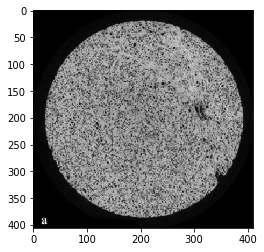

In [2]:
#read image
image = cv2.imread('CT scanned sample - (a).png')
plt.imshow(image)

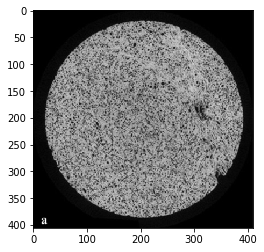

In [3]:
#convert image to gray (to single channel)
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
plt.imshow(gray,cmap='gray')

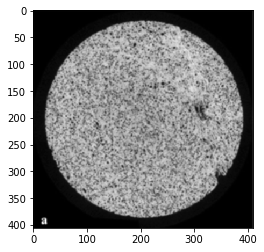

In [4]:
# convolving matrix of (5,5) and the image with Gaussian Function.
blur = cv2.GaussianBlur(gray,(5,5),1)
plt.imshow(blur,cmap='gray')

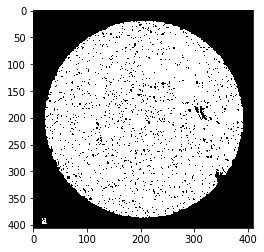

In [5]:
# used OTSU threshold to isolate the pores from the image. It assumes two classes of pixel and
# on the basis of bi-modal histogram converts the grayscale image into binary image.
ret, thresh = cv2.threshold(gray,10,50,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plt.imshow(thresh,cmap='gray')

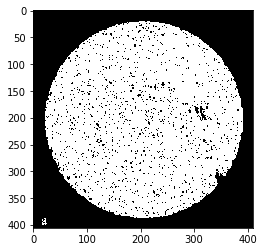

In [6]:
#morphologyEx is function to erode and dilate the image so that small grain particles can be removed.
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, (5,5))
plt.imshow(opening, cmap='gray')

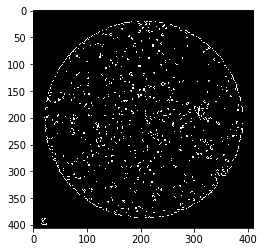

In [7]:
#canny edge detection to extract the pores edges.
canny = cv2.Canny(opening,0,255)
plt.imshow(canny,cmap='gray' )

In [8]:
# find contours in the binary image, which then further can be used to analyze the size of pores..
im2, contours, hierarchy = cv2.findContours(canny, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
i = image.copy()
for cnt in contours:
    cv2.drawContours(i, contours, -1, (255,0,0),-1)

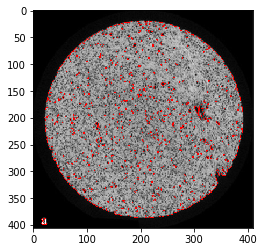

In [9]:
plt.imshow(i)

In [10]:
#labels pores
j = measure.label(i)

In [11]:
#measure properties like area, centrioid,etc.. of labeled pores.
k = measure.regionprops(j)

In [12]:
for e in range(len(k)):
    print(k[e]['area'])

3
9
3
3
420
3
15
12
3
3
3
9
3
3
3
3
3
3
3
3
3
6
3
3
6
3
3
6
6
3
6
3
3
6
3
3
3
3
3
3
3
3
6
6
3
3
3
3
3
3
3
3
6
3
3
6
3
3
3
3
3
3
3
3
3
6
3
9
6
3
3
6
6
9
6
3
9
3
3
3
3
12
9
12
3
3
429
3
3
3
3
3
3
12
435
3
33
3
9
9
12
6
18
3
9
6
48
3
3
30
3
6
3
12
3
3
3
6
3
3
6
3
3
3
3
3
3
3
3
15
3
3
9
3
9
6
3
15
15
3
6
6
3
3
15
3
12
6
15
9
51
3
3
3
6
3
411
6
3
3
3
6
879
3
9
12
3
3
3
9
3
3
3
3
18
12
3
12
3
6
3
18
6
39
3
3
42
18
3
6
6
3
12
3
9
18
6
3
3
18
3
3
9
6
6
15
6
3
51
3
9
3
3
3
3
3
21
3
3
3
3
6
6
3
3
21
24
6
3
3
15
24
3
3
3
3
12
3
3
3
3
3
12
6
18
21
3
42
12
6
3
3
3
3
6
420
3
3
3
21
3
6
3
3
3
9
24
3
93
6
9
3
15
36
3
6
3
12
9
18
3
3
36
30
12
12
3
12
3
3
12
3
3
6
3
3
6
6
3
441
3
3
3
6
3
3
6
3
3
3
15
3
15
3
15
3
3
3
3
12
3
6
3
9
15
15
6
3
3
6
9
3
9
9
30
6
15
3
3
6
6
3
3
3
3
3
411
3
18
3
6
6
3
3
12
9
3
9
9
3
6
3
18
9
6
3
12
6
12
6
3
12
21
6
3
3
3
42
18
6
3
3
9
3
3
6
3
6
15
6
9
15
9
15
12
18
18
30
15
3
6
15
429
411
405
39
6
3
3
3
9
6
12
60
33
6
3
21
3
3
15
6
12
12
6
18
3
39
9
30
12
3
6
3
3
3
3
54
6
12
3
3

3
3
3
1
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
6
3
6
6
3
3
12
6
9
3
15
6
48
3
3
6
3
9
3
3
42
15
3
3
3
6
6
6
9
9
3
9
9
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
6
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
2
6
3
3
6
3
3
6
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
12
3
3
3
3
3
3
3
6
3
3
3
3
3
3
6
3
6
15
27
3
12
3
3
3
3
9
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
14
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
1
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
6
12
9
3
6
3
6
3
3
3
6
3
12
9
3
3
9
3
6
6


3
3
3
3
9
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
9
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
9
6
6
3
90
12
3
3
3
3
6
81
3
6
6
9
3
3
3
15
6
9
6
9
3
3
6
6
6
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
6
3
3
9
3
3
3
3
3
3
3
3
3
3
3
19
3
3
3
3
3
3
6
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
9
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
6
6
6
12
3
6
15
3
24
6
6
6
3
6
3
42
6
48
3
57
6
3
3
12
6
9
18
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
6
3
3
3
3
3
3
6
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
9
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3

3
3
3
3
3
3
3
3
6
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
6
9
6
3
15
3
3
9
3
6
3
12
6
9
9
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
9
3
3
3
3
3
3
3
3
6
3
3
6
3
3
3
6
3
3
3
3
6
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
6
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
6
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
9
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
6
3
3
3
3
3
6
3
3
6
24
3
6
9
54
6
3
6
6
6
9
3
12
6
3
6
3
3
3
6
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
6
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
6
3
9
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
5
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
6
3

3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
6
3
3
3
4
3
3
3
3
3
3
3
3
6
3
3
3
6
3
3
6
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
6
3
3
3
3
6
3
9
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
6
3
3
3
3
3
3
6
6
3
15
6
9
3
3
3
6
6
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
4
3
3
6
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
15
48
3
24
27
3
3
3
3
3
60
3
3
3
3
18
9
6
6
3
6
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
6
3
3
3
3
3

3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
1
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
1
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
9
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
6
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
6
6
3
3
3
3
3
3
3
3
3
6
6
6
12
3
33
6
3
9
6
39
9
6
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
12
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
9
3
3
6
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
6
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3


3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
4
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
9
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
15
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
6
3
3
6
3
3
3
6
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
6
3
3
3
6
3
3
3
3
6
3
3
3
3
3
3
3
3
8
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
6
6
3
30
3
12
3
3
3
18
12
6
3
12
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
6
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
9
3
3
3
3
3
3
3
3
6
1
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
6
3
3
3
3
6
6
3
3
3
3
6
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
15
3
3
3
3
3
3
3
3
3
3
3
3
12
3
3
3
6
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3


3
10
3
3
3
3
3
3
9
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
6
3
3
6
3
3
3
3
3
3
3
3
3
6
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
21
18
3
6
6
3
3
15
3
12
6
27
6
3
6
3
3
3
3
9
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
6
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
6
19
3
6
3
3
9
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
6
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
6
3
3
9
9
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
9
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
6
3
3
3
3
3
6
6
3
3
3
3
3
3
5
3
3
6
3
12
6
6
3
6
3
3
3
18
3
3
3
3
3
3
3
3
9
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3

3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
6
6
3
6
3
3
12
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
9
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
6
10
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
6
3
3
3
6
3
3
3
3
3
3
3
3
3
3
6
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
4
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
9
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
12
12
9
6
12
12
3
9
3
3
6
27
6
3
3
3
6
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
10
3
9
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
12
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
6
3

3
3
3
3
3
3
3
3
3
6
3
3
3
6
3
3
3
6
3
3
3
3
9
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
6
3
3
3
3
3
3
3
3
6
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
6
6
3
3
6
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
6
6
3
3
3
3
3
3
3
3
5
6
4
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
6
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
6
3
3
6
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
9
6
3
3
6
3
3
3
6
33
18
18
9
12
3
9
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
6
3
3
3
3
9
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
6
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3


3
3
3
4
3
6
3
6
3
3
3
3
3
3
3
3
3
3
3
3
5
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
8
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
9
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
7
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
6
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
6
3
3
9
3
3
3
3
9
3
21
6
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
9
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
9
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
6
3
3
3
6
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
6
1
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
7
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
6
3
3
3
6
3
3
3
3
3
3
6
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
9
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3

3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
1
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
4
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
6
3
3
3
3
3
12
3
12
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
6
3
1
3
3
3
6
3
3
3
3
3
1
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
5
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
4
3
3
3
3
3
3
3
3
6
3
3
3
3
3
6
3
3
3
3
3
4
3
3
6
3
6
3
3
3
3
6
6
3
3
3
3
3
6
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
4
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
9
3
3
6
3
3
3
3
3
3
3
6
3
7
3
3
3
3
3
3
3
3
16
3
3
3
3
3
3
3
9
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3

3
6
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
4
3
6
6
3
3
3
6
3
3
3
3
3
3
3
3
6
3
12
6
6
9
42
3
54
3
18
3
6
3
3
42
15
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
6
3
3
3
3
3
3
3
3
6
3
3
9
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
6
3
3
3
9
3
4
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
6
3
3
3
3
3
9
3
3
3
3
6
3
3
3
6
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
6
3
6
3
3
3
3
6
3
3
6
3
3
3
6
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
9
6
3
3
1
3
3
6
3
3
3
3
3
3
6
3
21
3
9
3
3
3
6
3
3
3
6
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
6
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
6
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3

3
3
6
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
6
3
3
3
3
1
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
9
3
3
6
3
39
6
6
6
3
39
18
6
15
3
6
6
3
9
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
6
3
3
3
6
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
4
6
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
6
6
3
9
3
3
3
3
9
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
1
3
3
3
6
3
3
6
6
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
9
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
10
3
3
3
3
3
3
3
4
6
3
3
3
3
3
3
6
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
6
3
3
3
6
3
3
3
3
3
3
3
3
17
3
3
3
3
6
3
3
3
3
3
9
3
9
6
3
3
3
12
12
12
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3

3
3
3
6
3
3
3
3
3
3
3
6
3
3
3
3
3
3
6
3
3
3
3
3
3
6
6
3
3
6
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
6
3
3
3
3
3
3
3
3
3
3
3
3
9
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
6
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
2
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
12
6
9
3
12
12
6
6
6
948
3
6
75
3
3
3
3
3
3
3
3
6
3
3
3
3
6
6
6
3
3
6
6
3
3
3
6
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
6
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3


3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
9
3
3
3
2
3
3
3
3
3
9
6
21
3
3
9
3
3
3
3
420
420
21
3
18
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
1
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
2
6
3
3
3
3
3
3
1
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
6
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
6
3
3
6
3
3
3
6
3
3
3
3
3
3
6
3
3
6
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
9
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
33
12
6
3
3
6
9
9
3
114
15
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3


3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
33
6
12
6
3
6
9
9
6
3
3
3
6
3
3
3
6
3
4
3
3
3
3
3
6
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
9
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
6
3
6
3
3
6
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
6
3
3
6
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
6
3
3
9
3
6
3
12
3
3
9
6
3
3
3
3
3
3
3
3
3
3
6
3
12
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
6
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6


9
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
24
3
9
18
6
6
30
3
21
9
3
6
15
6
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
6
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
6
9
3
3
3
3
3
3
3
3
6
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
6
6
3
10
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
8
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
6
3
6
3
3
3
3
3
3
3
3
3
3
6
3
3
6
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
6
3
6
3
3
3
6
6
3
3
3
4
3
3
3
3
3
3
6
3
3
6
15
6
6
6
6
6
12
3
9
33
18
3
6
3
3
3
3
3
3
3
3
3
1
3
1
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
9
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3


3
3
3
3
3
6
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
6
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
9
3
3
3
3
3
3
3
3
9
3
15
3
6
21
3
9
3
3
3
15
18
3
3
3
3
3
3
3
3
6
3
6
3
3
3
6
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
9
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
6
3
6
3
3
3
3
6
3
3
3
3
9
3
3
3
3
3
3
3
3
3
1
3
6
3
3
3
3
3
6
3
3
3
3
3
9
3
3
3
6
3
9
3
3
3
3
3
3
3
3
12
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
5
3
3
3
3
3
14
3
3
3
3
3
3
3
3
4
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3


3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
4
3
3
3
3
3
3
6
3
3
3
3
6
3
3
3
12
3
3
3
3
3
3
6
3
3
6
3
3
6
3
9
12
6
12
6
36
18
15
6
3
9
3
9
6
6
3
3
3
3
6
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
6
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
5
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
6
3
3
3
3
6
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
12
6
12
9
21
9
12
15
6
3
12
12
6
6
9
3
15
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
6
3
6
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
6
3
3
3
3
3
3
9
3
6
3
3
3
6
6
3
3
3
3
3
3
6
3
3
3
3
3
3
6
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3


3
3
3
3
3
3
3
3
3
3
3
3
3
3
1
3
3
6
3
9
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
6
15
3
3
3
3
3
3
6
3
9
6
3
3
3
3
3
6
3
15
3
15
3
3
3
45
6
3
6
3
6
3
3
9
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
9
3
3
3
3
3
3
3
3
3
3
6
3
6
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
6
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
6
3
3
6
3
3
3
3
3
3
9
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
6
3
3
3
1
3
3
3
3
3
3
3
3
6
3
3
3
9
3
6
9
3
3
6
12
3
30
9
3
6
3
3
3
3
3
3
12
3
3
9
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
2
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
6
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
6
6
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3

24
3
18
6
15
6
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
9
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
6
3
3
3
6
6
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
9
6
3
6
3
9
33
3
12
3
9
3
3
6
3
3
3
6
72
3
3
9
3
3
33
9
6
3
3
3
9
3
3
3
3
3
6
3
3
3
3
3
3
3
3
4
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
4
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
4
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
1
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
76
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
6
9
3
6
9
9
6
36
6
6
6
3
3
6
3
3
3
3
12
9
24
6
18
6
3
3
3
6
9
3
27
3
15
18
3
6
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
9
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3